In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [3]:
df.shape

(7043, 10)

In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
2206,3207-OYBWH,Male,1,57,6,Month-to-month,Yes,95.25,5427.05,Yes
3182,6568-POCUI,Female,0,45,5,Two year,Yes,95.20,4285.80,No
6347,7718-RXDGG,Male,0,15,2,Month-to-month,Yes,68.60,1108.60,No
1280,2388-LAESQ,Female,1,72,9,Two year,Yes,114.85,8317.95,No
3877,2898-LSJGD,Female,0,21,5,One year,Yes,55.95,1157.05,Yes
5526,6546-OPBBH,Male,0,51,8,One year,Yes,23.95,1216.35,No
2780,4404-HIBDJ,Female,0,25,7,One year,No,74.30,1863.80,Yes
4338,9708-HPXWZ,Male,1,5,4,Month-to-month,No,45.40,214.75,No
2787,9838-BFCQT,Male,0,72,8,Two year,No,26.10,1851.45,No
2096,0761-AETCS,Female,0,1,7,Month-to-month,No,19.30,19.30,Yes


In [5]:
df.drop(columns='customerID',inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [7]:
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [8]:
cor_df = df[['tenure','ServiceCount','MonthlyCharges','TotalCharges']].copy()
cor_df


,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60


In [9]:
cor_df.describe()

,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,5.446259,64.761692,2282.589168
std,24.559481,1.964916,30.090047,2261.158811
min,0.000000,1.000000,18.250000,18.800000
25%,9.000000,4.000000,35.500000,403.775000
50%,29.000000,6.000000,70.350000,1406.000000
75%,55.000000,7.000000,89.850000,3778.050000
max,72.000000,9.000000,118.750000,8684.800000


<img src="">

In [10]:
cor_df.corr()

,tenure,ServiceCount,MonthlyCharges,TotalCharges
tenure,1.000000,0.508526,0.247900,0.823701
ServiceCount,0.508526,1.000000,0.041463,0.443015
MonthlyCharges,0.247900,0.041463,1.000000,0.649299
TotalCharges,0.823701,0.443015,0.649299,1.000000


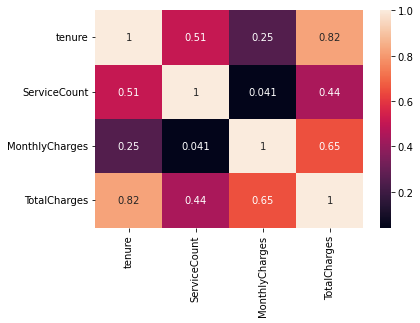

In [21]:
data_df = cor_df.corr()
hmap = sns.heatmap(data_df,annot=True)
plt.savefig('../Picture/Lab2/Heatmap.png')

In [12]:
lower = pd.DataFrame(np.tril(data_df,-1),columns = data_df.columns)
# lower_tri = cor_df.where(np.tril(np.ones(cor_df.shape),k=1).astype(np.bool))
lower
# df_lt = cor_df.where(np.tril(np.ones(cor_df.shape)).astype(np.bool))
# df_lt

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,0.000000,0.000000,0.000000,0.0
1,0.508526,0.000000,0.000000,0.0
2,0.247900,0.041463,0.000000,0.0
3,0.823701,0.443015,0.649299,0.0


In [13]:
to_drop = [column for column in lower.columns if any(lower[column] > 0.6)]
to_drop

['tenure', 'MonthlyCharges']

In [14]:
df_afterdrop = cor_df.drop(to_drop, axis=1)
print(df_afterdrop)
print(df_afterdrop.describe())

      ServiceCount  TotalCharges
0                2         29.85
1                4       1889.50
2                4        108.15
3                4       1840.75
4                2        151.65
...            ...           ...
7038             8       1990.50
7039             7       7362.90
7040             2        346.45
7041             3        306.60
7042             7       6844.50

[7043 rows x 2 columns]
       ServiceCount  TotalCharges
count   7043.000000   7043.000000
mean       5.446259   2282.589168
std        1.964916   2261.158811
min        1.000000     18.800000
25%        4.000000    403.775000
50%        6.000000   1406.000000
75%        7.000000   3778.050000
max        9.000000   8684.800000


In [15]:
le = preprocessing.LabelEncoder()
Output = pd.DataFrame({'Churn':le.fit_transform(df.Churn)})
Vari = df[['gender','Contract','PaperlessBilling']]
Vari['gender'] = le.fit_transform(Vari.gender)
Vari['Contract'] = le.fit_transform(Vari.Contract)
Vari['PaperlessBilling'] = le.fit_transform(Vari.PaperlessBilling)
Vari

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\2431198472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vari['gender'] = le.fit_transform(Vari.gender)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\2431198472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vari['Contract'] = le.fit_transform(Vari.Contract)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\2431198472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,gender,Contract,PaperlessBilling
0,0,0,1
1,1,1,0
2,1,0,1
3,1,1,0
4,0,0,1
...,...,...,...
7038,1,1,1
7039,0,1,1
7040,0,0,1
7041,1,0,1


In [16]:
Chi_table = chi2(Vari,Output)
print(Chi_table)


(array([2.58698618e-01, 1.11578017e+03, 1.05680863e+02]), array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025]))


In [17]:
p_value = Chi_table[1]
lower = pd.DataFrame(np.tril(p_value,-1),columns = Vari.columns)
to_drop = [column for column in lower if any(lower[column] > 0.05)]
to_drop


['gender']

In [18]:
Vari = Vari.drop(to_drop,axis=1)
Vari

,Contract,PaperlessBilling
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,1
7039,1,1
7040,0,1
7041,0,1


In [19]:
final_table = pd.concat([df_afterdrop,Vari], axis=1, join='inner')  #รวม column
final_table['Churn'] = Output        #เพิ่ม column
print(final_table)

      ServiceCount  TotalCharges  Contract  PaperlessBilling  Churn
0                2         29.85         0                 1      0
1                4       1889.50         1                 0      0
2                4        108.15         0                 1      1
3                4       1840.75         1                 0      0
4                2        151.65         0                 1      1
...            ...           ...       ...               ...    ...
7038             8       1990.50         1                 1      0
7039             7       7362.90         1                 1      0
7040             2        346.45         0                 1      0
7041             3        306.60         0                 1      1
7042             7       6844.50         2                 1      0

[7043 rows x 5 columns]
